## Regresion Logistica 
### Marco Antonio Jurado 20308


In [799]:
import numpy as np

In [800]:
import csv
with open('framingham.csv', 'r') as file:
    csv_reader = csv.reader(file)
    datacsv = []
    for row in csv_reader:
        datacsv.append(row)

header = datacsv[0]
i = 0
for name in header:
    print(i, name)
    i +=1

0 male
1 age
2 education
3 currentSmoker
4 cigsPerDay
5 BPMeds
6 prevalentStroke
7 prevalentHyp
8 diabetes
9 totChol
10 sysBP
11 diaBP
12 BMI
13 heartRate
14 glucose
15 TenYearCHD


In [801]:
rawDATA = np.genfromtxt('framingham.csv', delimiter=',', skip_header=True)
data = np.array(rawDATA)
print("head \n", data[:5])
print("\n\ntail \n", data[-5:])

head 
 [[  1.    39.     4.     0.     0.     0.     0.     0.     0.   195.
  106.    70.    26.97  80.    77.     0.  ]
 [  0.    46.     2.     0.     0.     0.     0.     0.     0.   250.
  121.    81.    28.73  95.    76.     0.  ]
 [  1.    48.     1.     1.    20.     0.     0.     0.     0.   245.
  127.5   80.    25.34  75.    70.     0.  ]
 [  0.    61.     3.     1.    30.     0.     0.     1.     0.   225.
  150.    95.    28.58  65.   103.     1.  ]
 [  0.    46.     3.     1.    23.     0.     0.     0.     0.   285.
  130.    84.    23.1   85.    85.     0.  ]]


tail 
 [[  1.    50.     1.     1.     1.     0.     0.     1.     0.   313.
  179.    92.    25.97  66.    86.     1.  ]
 [  1.    51.     3.     1.    43.     0.     0.     0.     0.   207.
  126.5   80.    19.71  65.    68.     0.  ]
 [  0.    48.     2.     1.    20.      nan   0.     0.     0.   248.
  131.    72.    22.    84.    86.     0.  ]
 [  0.    44.     1.     1.    15.     0.     0.     0.     0. 

Ahora se separa la X y la Y

In [802]:
X = data[:, 12].reshape(-1, 1)
Y = data[:, -1].reshape(-1, 1)
print(X.shape)
print(Y.shape)

(4238, 1)
(4238, 1)


In [803]:
if np.any(np.isnan(X)):
    print("Faltan datos en X.")
else:
    print("Todo bien en X.")

# Check if there are any NaN values in Y
if np.any(np.isnan(Y)):
    print("Faltan datos en Y.")
else:
    print("Todo bien en Y.")

Faltan datos en X.
Todo bien en Y.


debido a que faltan datos en X se procede a saber que porcentaje de estos es NaN

In [804]:
print('falta un porcentaje del:')
print((np.count_nonzero(np.isnan(X)) * 100) /(X.shape[0]))

falta un porcentaje del:
0.4483246814535158


Se usara SimpleImputer para llenar los datos faltantes con el metodo de mean

In [805]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)
if np.any(np.isnan(X)):
    print("Faltan datos en X.")
else:
    print("Todo bien en X.")

Todo bien en X.


Ahora ya no tenemos datos faltantes en ambas variables

In [806]:
print(X.shape)
print(Y.shape)

(4238, 1)
(4238, 1)


Procedemos a separar en test y entreno

In [807]:
import random
combinadoZIP = list(zip(X, Y))
random.shuffle(combinadoZIP)

shuffleX, shuffleY = zip(*combinadoZIP)
shuffleX, shuffleY = np.array(shuffleX), np.array(shuffleY)

In [808]:
np.random.seed(54)
shuffle_indices = np.random.permutation(X.shape[0])
X_shuffled = X[shuffle_indices]
Y_shuffled = Y[shuffle_indices]

entreno_temp = int(X.shape[0] * 0.7)

X_train, X_test = X_shuffled[:entreno_temp], X_shuffled[entreno_temp:]
Y_train, Y_test = Y_shuffled[:entreno_temp], Y_shuffled[entreno_temp:]

ahora las funciones que nos sirven para calcular la data donde la funcion de costo es cambiada de la de regresion lineal por la de regresion logistica. Cabe mencionar que es similar pero el detalle del sigmoide es lo que la diferencia.

In [809]:
sigmoid = lambda X, t: 1 / (1 + np.exp(-(X @ t)))
cost = lambda X, y, t: ((sigmoid(X, t) - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

In [810]:
def regLineal(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))
        if on_step:
            on_step(t)
    
    return t, costs

In [811]:
Xr = np.column_stack((np.ones_like(X), X))
theta_0 = np.random.rand(Xr.shape[1],1)
theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

thetass, costos = regLineal(Xr, Y, theta_0, cost, grad, a=0.0000000000000000001, n=1000)

xm = np.array([[0], [len(X)]])
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)

ym = xmr @ thetass

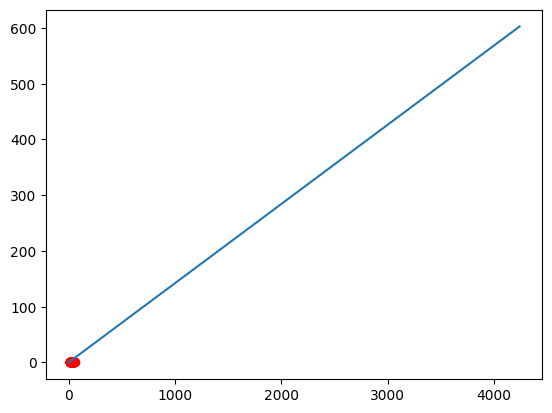

In [812]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro') #puntos
plt.plot(xm,ym) #regresion
plt.show()

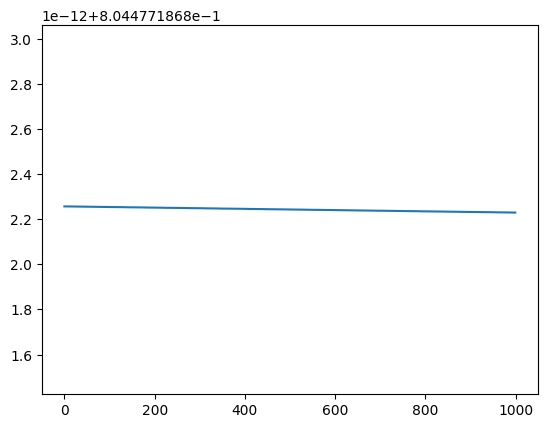

In [813]:
plt.plot(costos) #costo
plt.show()

Procedemos a buscar el polinomio

In [814]:
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)

(2966, 1)
(1272, 1)
(2966, 1)
(1272, 1)


Investigue como funciona Cross Validation de Scikit Learn pues en ocasiones pasadas no llegue a obtener resultados faciles de comprender. Por lo tanto he llegado a comprender el funcionamiento del mismo y obtengo lo siguiente.<br>
fuente utilizada: https://scikit-learn.org/stable/modules/cross_validation.html


In [815]:
def validacion(X, y, k, reg, cost, grad, a=0.1, n=1000, degree=1):
    scores = []
    temp_size = len(X) // k
    for i in range(k):
        X_test = X[i * temp_size:(i + 1) * temp_size]
        X_test_poly = np.power(X_test, degree)
        X_test_poly = np.column_stack((np.ones_like(X_test), X_test_poly))
        y_test = y[i * temp_size:(i + 1) * temp_size]
        X_train = np.concatenate([X[:i * temp_size], X[(i + 1) * temp_size:]])
        X_train_temp = np.power(X_train, degree) # se evaluan los polinomios
        y_train = np.concatenate([y[:i * temp_size], y[(i + 1) * temp_size:]])

        Xr = np.column_stack((np.ones_like(X_train), X_train_temp))
        theta_0 = np.random.rand(Xr.shape[1],1)
        theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

        t, g = regLineal(Xr, y_train, theta_0, cost, grad, a=a, n=n)

        score = cost(X_test_poly, y_test, t)
        scores.append(score)

    promediado = np.mean(scores)
    return promediado

In [816]:
X_shuffled.shape

(4238, 1)

In [817]:
Y_shuffled.shape

(4238, 1)

In [818]:
np.zeros(X_train.shape[1])

array([0.])

In [819]:
res = []
tempAlfa = 0.00000001
for i in range(1,11):
    tempAlfa = tempAlfa / 1000000000000000
    score = validacion(X_shuffled, Y_shuffled, k=5, reg=regLineal, cost=cost, grad=grad, a=tempAlfa, n=1000, degree=i)
    res.append(score)
    print(f"El puntaje promedio de cross validation con el polinomio {i} con k={k} es {score}")

El puntaje promedio de cross validation con el polinomio 1 con k=5 es 0.8483985014227624
El puntaje promedio de cross validation con el polinomio 2 con k=5 es 0.848406015358411
El puntaje promedio de cross validation con el polinomio 3 con k=5 es 0.8484061393152302
El puntaje promedio de cross validation con el polinomio 4 con k=5 es 0.8484061393152302
El puntaje promedio de cross validation con el polinomio 5 con k=5 es 0.8484061393152302
El puntaje promedio de cross validation con el polinomio 6 con k=5 es 0.8484061393152302
El puntaje promedio de cross validation con el polinomio 7 con k=5 es 0.8484061393152302
El puntaje promedio de cross validation con el polinomio 8 con k=5 es 0.8484061393152302
El puntaje promedio de cross validation con el polinomio 9 con k=5 es 0.8484061393152302
El puntaje promedio de cross validation con el polinomio 10 con k=5 es 0.8484061393152302


In [821]:
res = np.array(res)
mejor_prom = np.max(res)
indi_temp = np.argmax(res)
print("El valor más grande es:", mejor_prom)
print("Su índice es:", indi_temp)

El valor más grande es: 0.8484061393152302
Su índice es: 2


## conclusion
Es asi como se puede concluir que se obtiene el mejor resultado utilizando un polinomio de grado 2 en la regresion logistica teniendo asi un valor de accuracy de un 84.84%